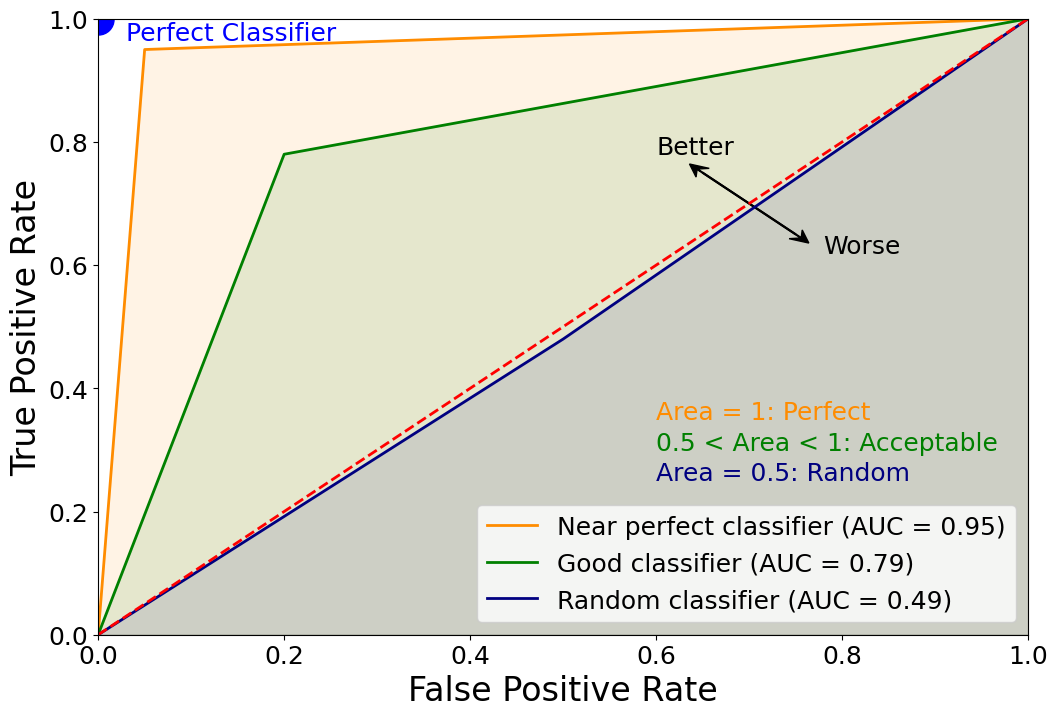

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Set random seed for reproducibility
np.random.seed(0)

# Create dummy datasets with 200 data points
y_real_perfect = np.concatenate([np.zeros(100), np.ones(100)])
y_pred_perfect = np.concatenate([np.zeros(95), np.ones(5), np.ones(95), np.zeros(5)])

y_real_good = np.concatenate([np.zeros(100), np.ones(100)])
y_pred_good = np.concatenate([np.random.choice([0, 1], p=[0.75, 0.25], size=100), 
                              np.random.choice([0, 1], p=[0.25, 0.75], size=100)])

y_real_random = np.concatenate([np.zeros(100), np.ones(100)])
y_pred_random = np.random.choice([0, 1], size=200)

# Compute ROC curves
fpr_perfect, tpr_perfect, _ = roc_curve(y_real_perfect, y_pred_perfect)
roc_auc_perfect = auc(fpr_perfect, tpr_perfect)

fpr_good, tpr_good, _ = roc_curve(y_real_good, y_pred_good)
roc_auc_good = auc(fpr_good, tpr_good)

fpr_random, tpr_random, _ = roc_curve(y_real_random, y_pred_random)
roc_auc_random = auc(fpr_random, tpr_random)

# Plot
plt.figure(figsize=(12,8))
lw = 2

# ROC curves
plt.plot(fpr_perfect, tpr_perfect, color='darkorange',
         lw=lw, label='Near perfect classifier (AUC = %0.2f)' % roc_auc_perfect)
plt.fill_between(fpr_perfect, tpr_perfect, color='darkorange', alpha=0.1)

plt.plot(fpr_good, tpr_good, color='green',
         lw=lw, label='Good classifier (AUC = %0.2f)' % roc_auc_good)
plt.fill_between(fpr_good, tpr_good, color='green', alpha=0.1)

plt.plot(fpr_random, tpr_random, color='navy', 
         lw=lw, label='Random classifier (AUC = %0.2f)' % roc_auc_random)
plt.fill_between(fpr_random, tpr_random, color='navy', alpha=0.1)

# Diagonal line
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')

# Annotations
plt.text(0.6, 0.35, 'Area = 1: Perfect', color='darkorange', fontsize = 18)
plt.text(0.6, 0.30, '0.5 < Area < 1: Acceptable', color='green', fontsize = 18)
plt.text(0.6, 0.25, 'Area = 0.5: Random', color='navy', fontsize = 18)

# Double-headed arrow
plt.arrow(0.65, 0.75, 0.1, -0.1, color='black', head_width=0.02, head_length=0.02, overhang=0.4)
plt.arrow(0.75, 0.65, -0.1, 0.1, color='black', head_width=0.02, head_length=0.02, overhang=0.4)
plt.text(0.6, 0.78, 'Better', color='black', fontsize = 18)
plt.text(0.78, 0.62, 'Worse', color='black', fontsize = 18)

# Plot aesthetics
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 24)
plt.ylabel('True Positive Rate', fontsize = 24)
# plt.title('AUC - ROC Kurve', fontsize=20, pad = 14)
plt.legend(loc="lower right", fontsize=18)
plt.tick_params(axis="both", labelsize=18)

# Mark the perfect classifier
plt.scatter([0], [1], color='blue', s=500)
plt.text(0.03, 0.965, 'Perfect Classifier', color='blue', fontsize=18)
plt.savefig('img/roc-auc.pdf', dpi = 300)
plt.show()
